# 探索数据集
## 分析的问题

-  是否生还与年龄的相关性。以及年龄的分布区间。
2. 是否生还与票价高低的相关性。
3. 是否生还与性别的关系
4. 是否生还与是否有父母孩子个数的相关性。

In [16]:
import numpy as np
import pandas as pd

path = '/Users/kiddiebao/machine-Learning/P4/Search datas/'
filename = 'titanic-data.csv'
# 读取cvs为datafame数据
titanic_data_df = pd.read_csv(path + filename)
titanic_data_df.head()

549

Populating the interactive namespace from numpy and matplotlib


/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ValueError: 'explode' must be of length 'x'

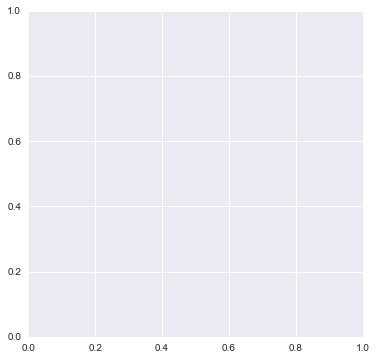

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%pylab inline
# 生还者与未生还者的比例
plt.figure(figsize=(6, 6))
labels= ['Survived','Un survived']
colors = ['red','yellowgreen']
# sizes = titanic_data_df.groupby('Survived').size()
sizes = [20,80]
explode = (0.05,0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)

In [2]:
titanic_data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 分析第一个问题
##### 泰坦尼克号乘客年龄的与是否生还均值的分布区间

Populating the interactive namespace from numpy and matplotlib


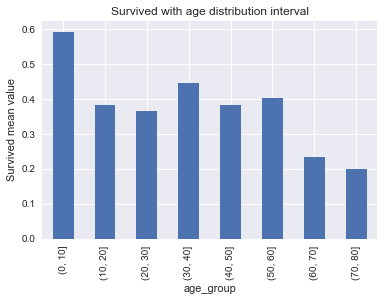

In [13]:

def age_cut_arrage(pd_data,column_name = 'Age'):
    entrins = np.arange(0,90,10)
    return pd.cut(pd_data[column_name],entrins)
plt.xlabel('Distribution interval')
plt.ylabel('Survived mean value')
plt.title('Survived with age distribution interval')
titanic_data_df['age_group'] = age_cut_arrage(titanic_data_df)
titanic_data_df.groupby('age_group').mean()['Survived'].plot(kind='bar')

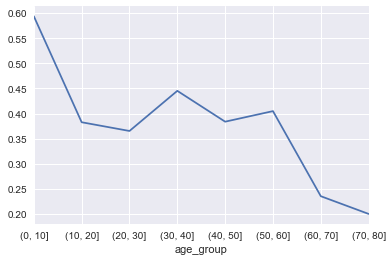

In [9]:
titanic_data_df.groupby('age_group').mean()['Survived'].plot()

#####  根据上图大致可以看出，随着年龄的增高，其生还率会降低。

#### 是否生还与年龄的相关性

In [46]:
def correlation(x, y):
    x_std = (x - x.mean()) / x.std()
    y_std = (y - y.mean()) /  y.std()
    return (x_std * y_std).mean()

correlation(titanic_data_df['Survived'],titanic_data_df['Age'])

-0.07788430661609241

###### 由此可得出，是否生还与年龄的相关性不大。